In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [45]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [27]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


<Axes: >

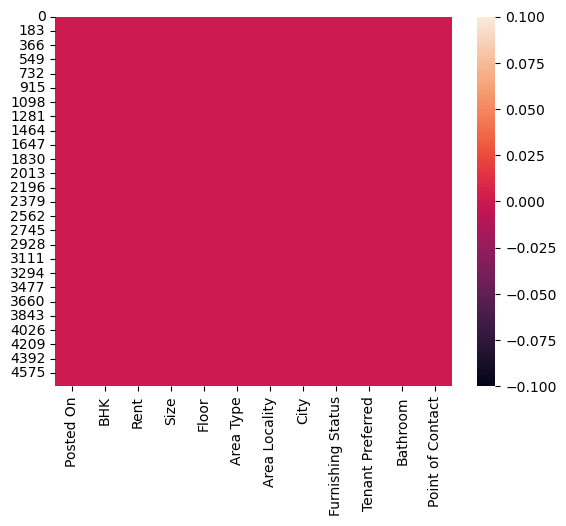

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.duplicated().sum()

df= df.drop_duplicates()

df.shape

(4746, 12)

In [31]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


C:\Users\aruli\AppData\Local\Temp\ipykernel_2320\526426338.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: title={'center': 'Perbedaan rental di berbagai kota berdasarkan BHK (Bedroom, Hall, Kitchen)'}, xlabel='City', ylabel='Rent'>

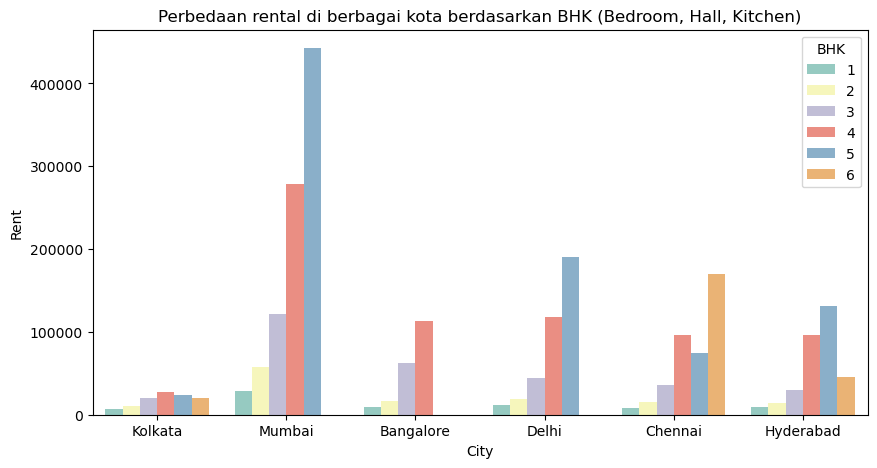

In [32]:
plt.figure(figsize = (10, 5))

plt.title("Perbedaan rental di berbagai kota berdasarkan BHK (Bedroom, Hall, Kitchen)")

sns.barplot(x= df["City"], y=df["Rent"], hue= df["BHK"],palette="Set3", ci = None)

C:\Users\aruli\AppData\Local\Temp\ipykernel_2320\492762084.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: title={'center': 'Perbedaan Rental di berbagai Kota Berdasarkan Tipe Area'}, xlabel='City', ylabel='Rent'>

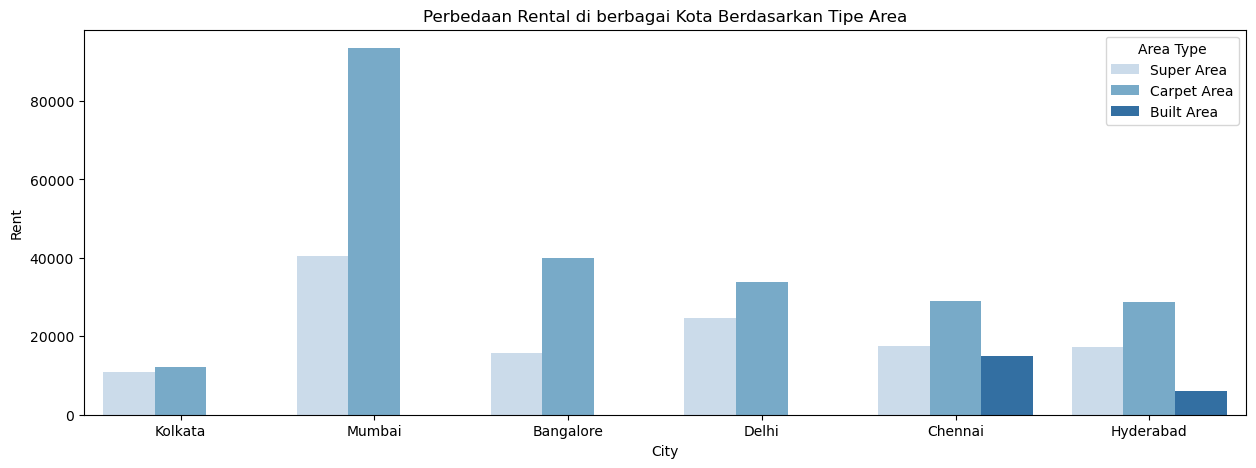

In [33]:
plt.figure(figsize = (15, 5))

plt.title("Perbedaan Rental di berbagai Kota Berdasarkan Tipe Area")

sns.barplot(x= df["City"], y=df["Rent"], hue= df["Area Type"], palette="Blues",ci = None)


C:\Users\aruli\AppData\Local\Temp\ipykernel_2320\2678029741.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




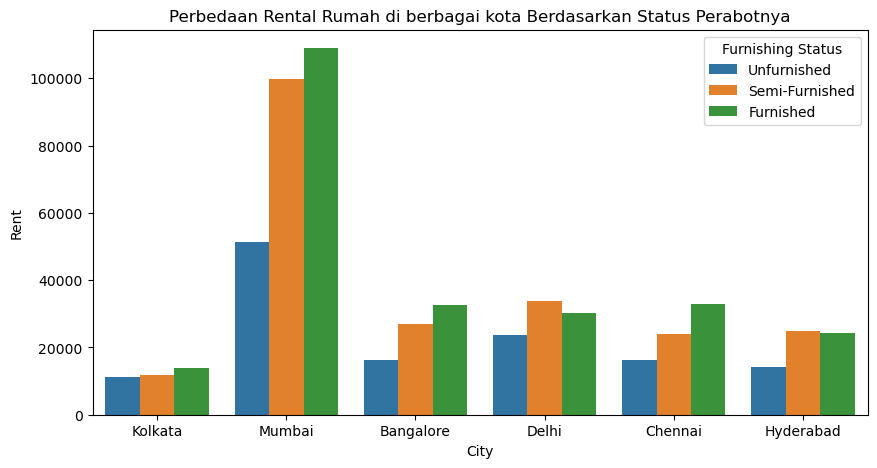

In [34]:
plt.figure(figsize=(10,5))

#Add title
plt.title("Perbedaan Rental Rumah di berbagai kota Berdasarkan Status Perabotnya")

sns.barplot(x=df["City"], y=df["Rent"], hue=df["Furnishing Status"], ci=None)

plt.show()

In [35]:
figure2 = px.bar(df, x=df["City"], y = df["Rent"], color = df["Size"], title="Sewa di Berbagai Kota Berdasarkan Ukuran Perabot Rumah")
figure2.show()

In [36]:
cities = df["City"].value_counts()
labels = cities.index
counts = cities.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=counts, hole=0.5)])
fig.update_layout(title_text='Rumah yang masih tersedia untuk di sewa')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=25,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))

In [37]:
df["Area Type"] = df["Area Type"].map({"Super Area": 1, 
                                           "Carpet Area": 2, 
                                           "Built Area": 3})
df["City"] = df["City"].map({"Mumbai": 4000, "Chennai": 6000, 
                                 "Bangalore": 5600, "Hyderabad": 5000, 
                                 "Delhi": 1100, "Kolkata": 7000})
df["Furnishing Status"] = df["Furnishing Status"].map({"Unfurnished": 0, 
                                                           "Semi-Furnished": 1, 
                                                           "Furnished": 2})
df["Tenant Preferred"] = df["Tenant Preferred"].map({"Bachelors/Family": 2, 
                                                         "Bachelors": 1, 
                                                         "Family": 3})

In [38]:
x = np.array(df[["BHK", "Size", "Area Type", "City", 
                   "Furnishing Status", "Tenant Preferred", 
                   "Bathroom"]])
y = np.array(df[["Rent"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.10,random_state=42)

In [39]:
clf = DecisionTreeRegressor()
clf.fit(x,y)
pred = clf.predict(xtest)

In [40]:
print('Score Akurasi = ', r2_score(ytest,pred))

Score Akurasi =  0.9883176394507799


In [43]:

features = np.array([[1, 100, 2, 4000, 2, 1, 1]])
print("Prediksi harga rumah dalam Rupee = ", clf.predict(features))

Prediksi harga rumah dalam Rupee =  [16000.]


In [42]:
import pickle

filename = 'estimasi_harga_rental.sav'
pickle.dump(clf,open(filename, 'wb'))